In [1]:
import spatialproteomics as sp
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import medfilt2d
import pandas as pd


In [2]:
image = imread("/dss/dsshome1/00/ge65tib2/Spatialproteomics/reg002_X01_Y01_Z01.tif")
image.shape


(10, 9060, 7524)

In [3]:
markers = ['DAPI', 'Ki67', 'Keratin5', 'CD68', 'Podoplanin', 'SMA', 'CD107a', 'CLDN17',
       'CD34', 'HLA-DR']
sp_object = sp.load_image_data(image, channel_coords=markers)


In [4]:
sp_object

<xarray.Dataset> Size: 682MB
Dimensions:   (channels: 10, y: 9060, x: 7524)
Coordinates:
  * channels  (channels) <U10 400B 'DAPI' 'Ki67' 'Keratin5' ... 'CD34' 'HLA-DR'
  * y         (y) int64 72kB 0 1 2 3 4 5 6 ... 9054 9055 9056 9057 9058 9059
  * x         (x) int64 60kB 0 1 2 3 4 5 6 ... 7518 7519 7520 7521 7522 7523
Data variables:
    _image    (channels, y, x) uint8 682MB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

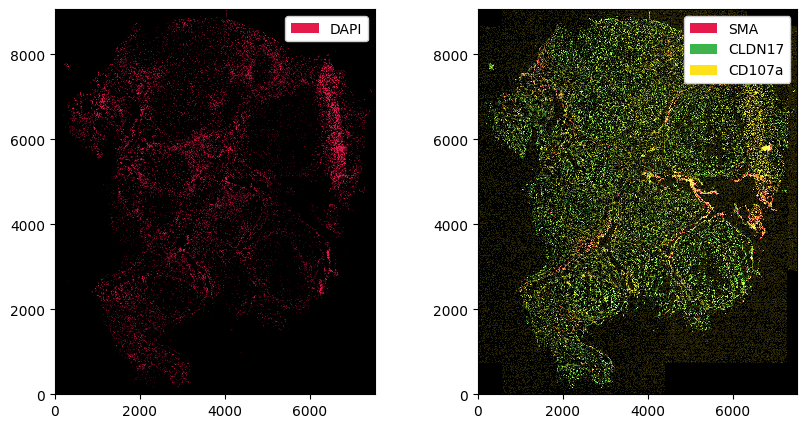

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object.pp[['SMA', 'CLDN17', 'CD107a']].pl.show(ax=ax[1])


In [6]:
ds_cellpose = sp_object.tl.cellpose(channel="DAPI", model_type='nuclei', flow_threshold=0.6)



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.4 
platform:       	linux 
python version: 	3.10.18 
torch version:  	2.7.1+cu126! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




** TORCH CUDA version installed and working. **
>>>> using GPU (CUDA)
>>>> loading model /dss/dsshome1/00/ge65tib2/.cellpose/models/cpsam


In [7]:
ds_cellpose

<xarray.Dataset> Size: 820MB
Dimensions:        (channels: 10, y: 9060, x: 7524, cells: 58005, features: 2)
Coordinates:
  * channels       (channels) <U10 400B 'DAPI' 'Ki67' ... 'CD34' 'HLA-DR'
  * y              (y) int64 72kB 0 1 2 3 4 5 ... 9054 9055 9056 9057 9058 9059
  * x              (x) int64 60kB 0 1 2 3 4 5 ... 7518 7519 7520 7521 7522 7523
  * cells          (cells) int64 464kB 1 2 3 4 5 ... 58002 58003 58004 58005
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 682MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    _segmentation  (y, x) uint16 136MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 928kB 92.66 2.87e+03 ... 4.024e+03

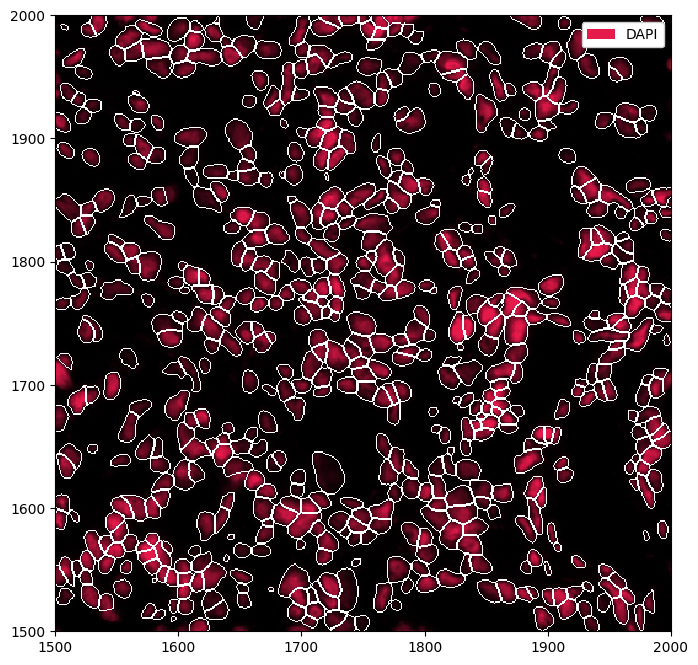

In [8]:

plt.figure(figsize=(16, 8))
_ = ds_cellpose.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True)

In [14]:
ds_stardist = sp_object.tl.stardist(channel="DAPI", key_added="_segmentation")

2025-06-26 15:51:49.827920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-26 15:51:49.828099: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found model '2D_versatile_fluo' for 'StarDist2D'.


2025-06-26 15:52:17.948032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-26 15:52:17.950745: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-26 15:52:17.951403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


100%|██████████| 144/144 [06:24<00:00,  2.67s/it]


In [15]:
ds_stardist

<xarray.Dataset> Size: 956MB
Dimensions:        (channels: 10, y: 9060, x: 7524, cells: 75413, features: 2)
Coordinates:
  * channels       (channels) <U10 400B 'DAPI' 'Ki67' ... 'CD34' 'HLA-DR'
  * y              (y) int64 72kB 0 1 2 3 4 5 ... 9054 9055 9056 9057 9058 9059
  * x              (x) int64 60kB 0 1 2 3 4 5 ... 7518 7519 7520 7521 7522 7523
  * cells          (cells) int64 603kB 1 2 3 4 5 ... 75410 75411 75412 75413
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 682MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    _segmentation  (y, x) int32 273MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 1MB 5.828e+03 ... 5.743e+03

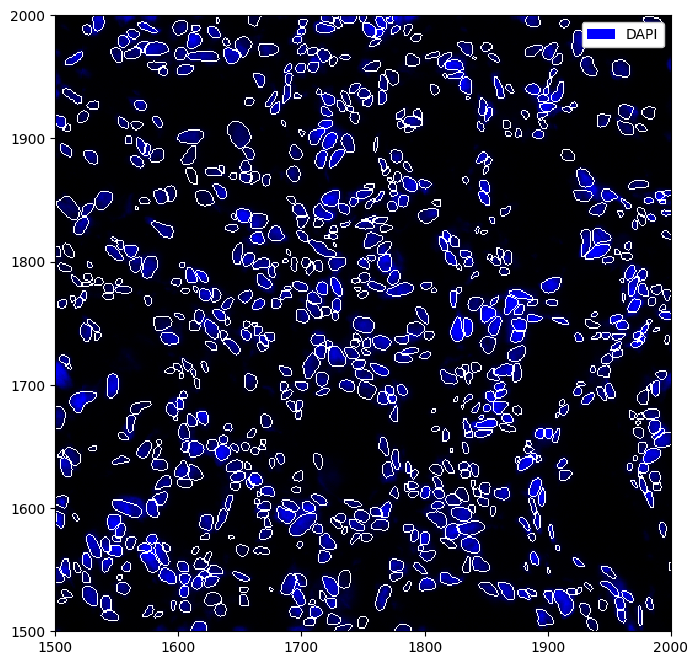

In [16]:
plt.figure(figsize=(16, 8))
_ = ds_stardist.pp["DAPI"].pp[1500:2000, 1500:2000].pl.colorize("blue").pl.show(render_segmentation=True)

area          15.000000
centroid-0    92.658333
centroid-1    16.708861
dtype: float64

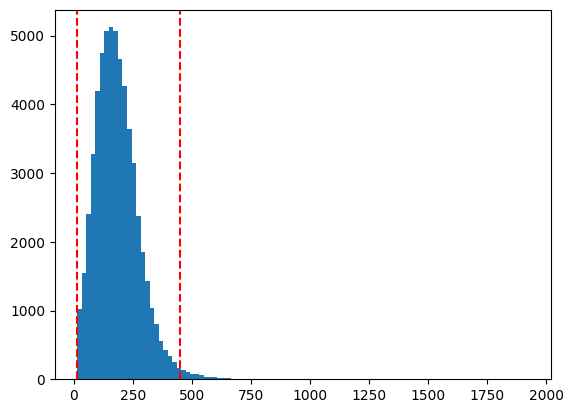

In [11]:
ds_cellpose = ds_cellpose.pp.add_observations("area")
df_cellpose = ds_cellpose.pp.get_layer_as_df("_obs")
_ = plt.hist(df_cellpose["area"], bins=100)
_ = plt.axvline(x=15, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=450, color='red', linestyle='--', label='x = 250')
Min_value= df_cellpose.min()
Min_value

area            6.0
centroid-0    125.8
centroid-1      5.5
dtype: float64

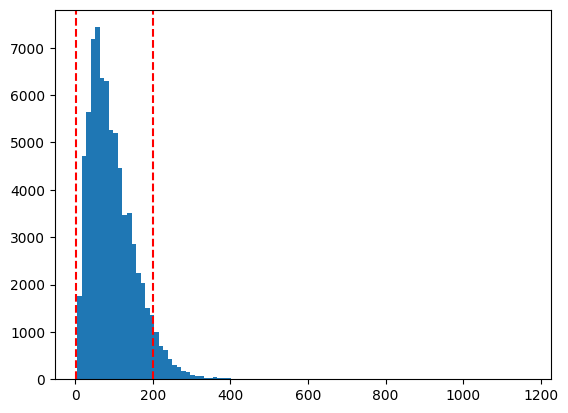

In [20]:
ds_stardist = ds_stardist.pp.add_observations("area")
df_stardist = ds_stardist.pp.get_layer_as_df("_obs")
_ = plt.hist(df_stardist["area"], bins=100)
_ = plt.axvline(x=3, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=200, color='red', linestyle='--', label='x = 250')
Min_value= df_stardist.min()
Min_value


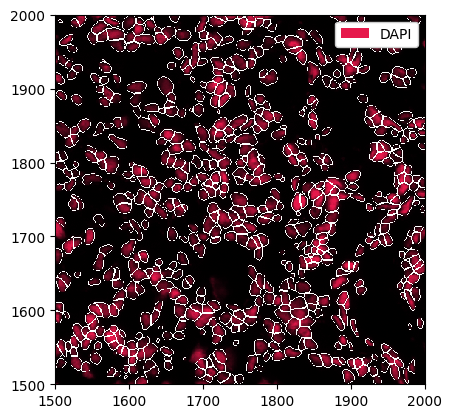

In [12]:
ds_cellpose = ds_cellpose.pp.filter_by_obs("area", func=lambda x: (x > 15) & (x < 450))
# plotting the result
_ = ds_cellpose.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True)



In [13]:
ds_cellpose = ds_cellpose.pp.grow_cells(iterations=2)
ds_cellpose

Mask growing requires recalculation of the observations. All features other than the centroids will be removed and should be recalculated with pp.add_observations().


<xarray.Dataset> Size: 820MB
Dimensions:        (channels: 10, y: 9060, x: 7524, cells: 57301, features: 2)
Coordinates:
  * channels       (channels) <U10 400B 'DAPI' 'Ki67' ... 'CD34' 'HLA-DR'
  * y              (y) int64 72kB 0 1 2 3 4 5 ... 9054 9055 9056 9057 9058 9059
  * x              (x) int64 60kB 0 1 2 3 4 5 ... 7518 7519 7520 7521 7522 7523
  * cells          (cells) int64 458kB 1 2 3 4 5 ... 57298 57299 57300 57301
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 682MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    _segmentation  (y, x) uint16 136MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 917kB 92.62 2.87e+03 ... 4.024e+03

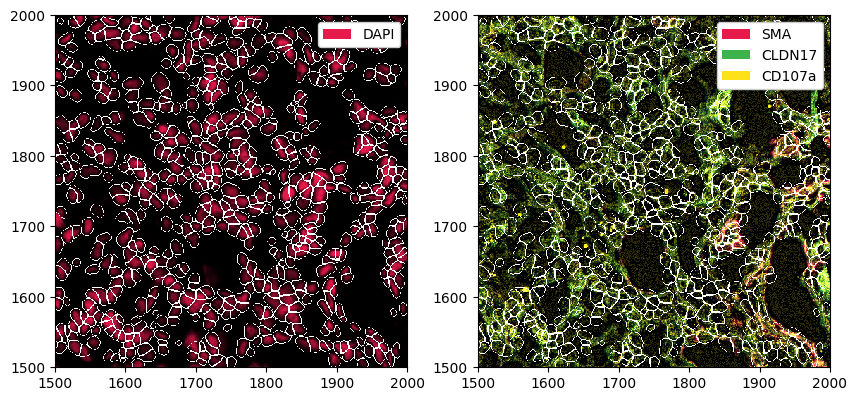

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ds_cellpose.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0])
_ = ds_cellpose.pp[['SMA', 'CLDN17', 'CD107a']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[1])

In [16]:
percentiles = [0.95] * 10

ds_cellpose = ds_cellpose.pp.threshold(percentiles).pp.apply(medfilt2d, kernel_size=3)


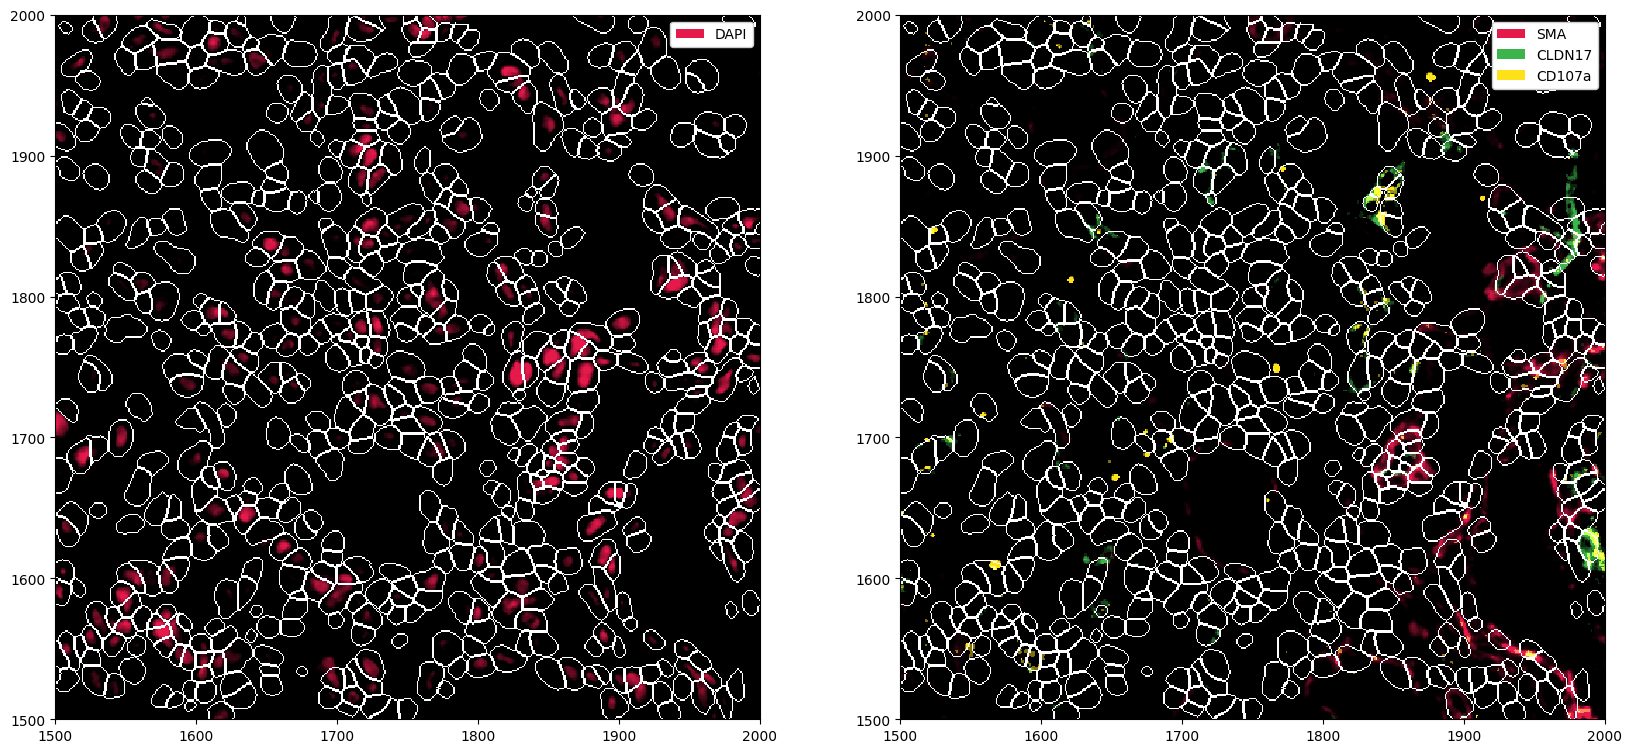

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
_ = ds_cellpose.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0])
_ = ds_cellpose.pp[['SMA', 'CLDN17', 'CD107a']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True,ax=ax[1])

In [18]:
def multiply_array(arr, factor=10):
    return (arr * factor).clip(0, 255).astype("uint8")
ds_cellpose_1 = ds_cellpose.pp.apply(func=multiply_array)


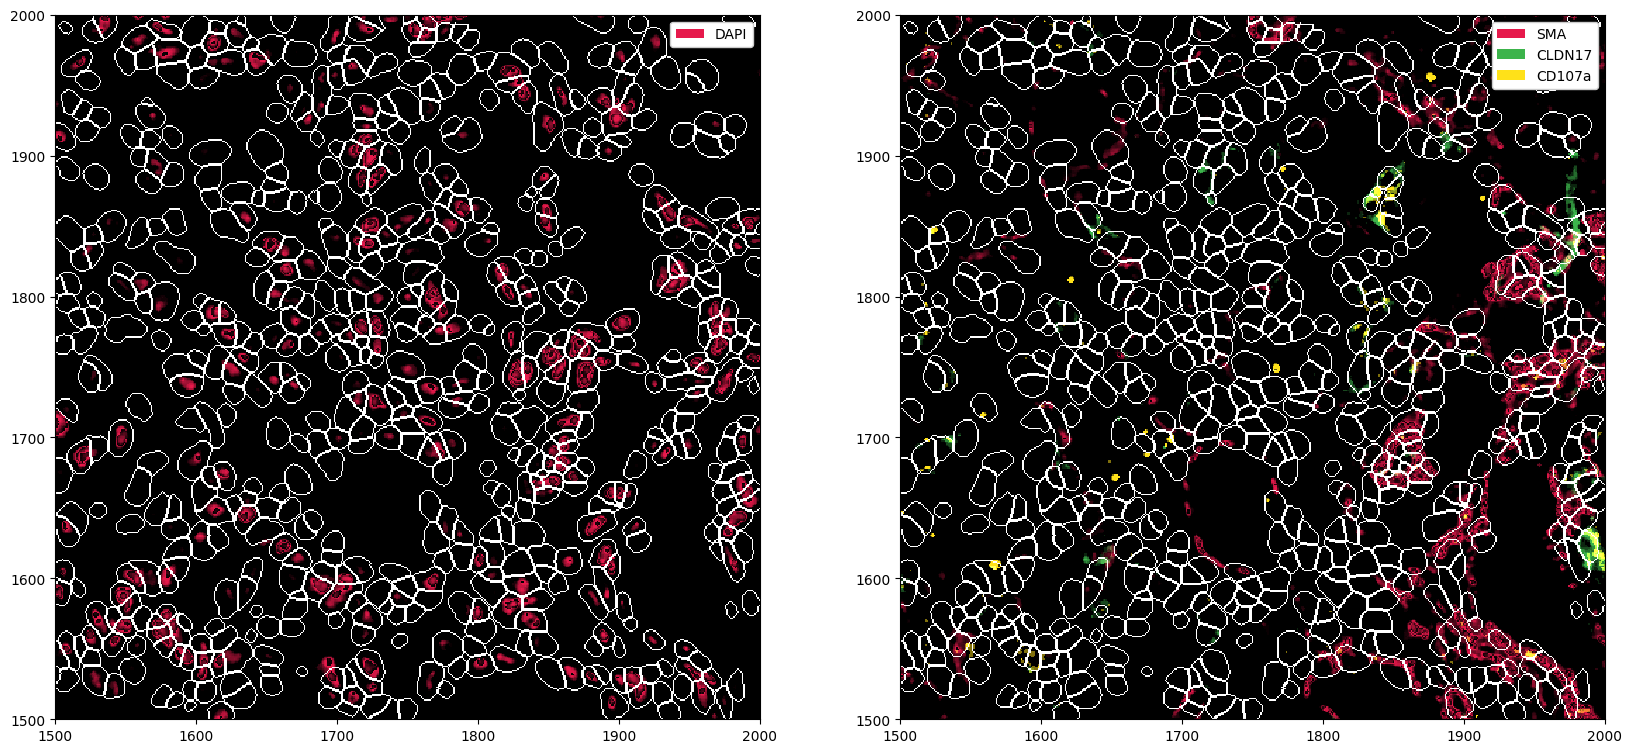

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
_ = ds_cellpose_1.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0])
_ = ds_cellpose_1.pp[['SMA', 'CLDN17', 'CD107a']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True,ax=ax[1])

In [22]:
import os
import shutil

In [23]:
# other methods called  "arcsinh", "zscore", "minmax", "double_zscore", and "clip'
sp_object_1= ds_cellpose.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="arcsinh")
sp_object_1

# putting the expression matrix into an anndata object
adata = sp_object_1.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_arcsinh.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_arcsinh.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)
    
# exporting as zarr
sp_object_1.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_arcsinh.zarr")

In [24]:
sp_object_2= ds_cellpose.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="zscore")
sp_object_2

# putting the expression matrix into an anndata object
adata = sp_object_2.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_2.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_zscore.zarr")

In [25]:
sp_object_3= ds_cellpose.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="double_zscore")
sp_object_3

# putting the expression matrix into an anndata object
adata = sp_object_3.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_double_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_double_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_3.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_double_zscore.zarr")

In [26]:
sp_object_4 = ds_cellpose.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="minmax")
sp_object_4

# putting the expression matrix into an anndata object
adata = sp_object_4.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_minmax.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_minmax.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_4.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_minmax.zarr")

In [27]:
sp_object_5 = ds_cellpose.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="clip")
sp_object_5

# putting the expression matrix into an anndata object
adata = sp_object_5.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_clip.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_clip.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_5.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_clip.zarr")